<h1> Preprocessing Data </h1>

<h2> Import necessary libraries </h2>

In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt

<h2>Read raw data from file <font color="blue">"steam_game.csv" </font></h2>


In [2]:
df = pd.read_csv('steam_game.csv')
df.head(10)

Title  \
0  Endless Monday: Dreams and Deadlines   
1                          SenrenÔºäBanka   
2                          A Short Hike   
3                              Aseprite   
4                  Cats Hidden in Paris   
5               Papa's Freezeria Deluxe   
6             Cats Hidden in Jingle Jam   
7                An Arcade Full of Cats   
8                                    Ib   
9                        Lil Gator Game   

                                               Genre  \
0                                   Adventure, Indie   
1                                  Adventure, Casual   
2                                   Adventure, Indie   
3  Animation & Modeling, Design & Illustration, G...   
4                        Casual, Indie, Free to Play   
5        Action, Casual, Indie, Simulation, Strategy   
6                        Casual, Indie, Free to Play   
7                        Casual, Indie, Free to Play   
8                                   Adventure, Indie   
9                   Action, Adventure, Casual, Indie   

                                                Tags withDLC isMature  \
0  Visual Novel, Choose Your Own Adventure, Inter...   False    False   
1  Visual Novel, NSFW, Casual, Dating Sim, Anime,...   False     True   
2  Exploration, Adventure, Relaxing, Cute, Indie,...   False    False   
3  Pixel Graphics, Design & Illustration, Animati...   False    False   
4  Cats, Hidden Object, Puzzle, Wholesome, Relaxi...    True    False   
5  Cooking, Time Management, Simulation, Casual, ...   False    False   
6  Free to Play, Cats, Hidden Object, Wholesome, ...   False    False   
7  Cats, Hidden Object, Relaxing, Wholesome, Puzz...    True    False   
8  Horror, 2D, RPGMaker, Psychological Horror, Pi...   False    False   
9  Casual, Cozy, Relaxing, Cute, Wholesome, Famil...   False    False   

           Franchise   ReleaseDate         Developer          Publisher  \
0     Endless Monday   4 May, 2023            hcnone             hcnone   
1                NaN  14 Feb, 2020          YUZUSOFT       HIKARI FIELD   
2                NaN  30 Jul, 2019          adamgryu           adamgryu   
3                NaN  22 Feb, 2016     David Capello       Igara Studio   
4     Travellin Cats  16 Jul, 2023    Travellin Cats     Travellin Cats   
5         Papa Louie  31 Mar, 2023  Flipline Studios   Flipline Studios   
6     Travellin Cats   1 Dec, 2023    Travellin Cats     Travellin Cats   
7            Devcats  16 Nov, 2023           Devcats            Devcats   
8            PLAYISM  11 Apr, 2022             kouri            PLAYISM   
9  Playtonic Friends  14 Dec, 2022        MegaWobble  Playtonic Friends   

                                           Languages PositiveReviews  \
0                                  English, Japanese             737   
1  English, Japanese, Simplified Chinese, Traditi...        (17,148)   
2  English, French, Spanish - Latin America, Japa...        (14,772)   
3                                            English        (15,565)   
4  English, French, Italian, German, Spanish - Sp...        (12,039)   
5                                            English         (6,514)   
6  English, French, Italian, German, Spanish - Sp...         (5,097)   
7  English, French, Italian, German, Spanish - Sp...         (3,018)   
8  English, Japanese, Simplified Chinese, Traditi...         (3,068)   
9  English, French, German, Portuguese - Brazil, ...         (3,363)   

  TotalReviews NegativeReviews OriginalPrice DiscountPercent  
0          737             0.0   142.000,00‚Ç´             NaN  
1     (17,298)           150.0   280.000,00‚Ç´             NaN  
2     (14,884)           112.0   100.000,00‚Ç´             NaN  
3     (15,693)           128.0   188.000,00‚Ç´             NaN  
4     (12,144)           105.0          Free             NaN  
5      (6,562)            48.0    87.500,00‚Ç´             NaN  
6      (5,108)            11.0          Free             NaN  
7   

<h2>Ta xem x√©t c√≥ t·ªïng c·ªông bao nhi√™u h√†ng v√† c·ªôt thu·ªôc t√≠nh ·ªü t·∫≠p d·ªØ li·ªáu th√¥ </h2>
N·∫øu d·ªØ li·ªáu c√≥ tr√™n 1000 d√≤ng v√† ph·∫£i c√≥ tr√™n 5 c·ªôt thu·ªôc t√≠nh th√¨ d·ªØ li·ªáu m·ªõi ƒë·ªß ƒë·ªÉ ti·∫øn h√†nh c√°c b∆∞·ªõc khai th√°c, x√¢y d·ª±ng m√¥ h√¨nh h·ªçc m√°y, h·ªçc s√¢u, ... 

Ng∆∞·ª£c l·∫°i, d·ªØ li·ªáu qu√° √≠t, kh√¥ng ƒë·ªß -> c·∫ßn thu th·∫≠p th√™m d·ªØ li·ªáu

In [3]:
num_rows, num_cols = df.shape
print(f'Current shape of data: {df.shape}')
if (num_rows > 100) & (num_cols > 5):
    print('Data is good !')
else:
    print('You should collect more data')

Current shape of data: (4841, 15)
Data is good !


### Ta xem x√©t √Ω nghƒ©a c·ªßa t·ª´ng c·ªôt d·ªØ li·ªáu
1. Title: T√™n tr√≤ ch∆°i ƒëi·ªán t·ª≠ tr√™n website steam
2. Genre: Th·ªÉ lo·∫°i tr√≤ ch∆°i
3. Tags: c√°c nh√£n tr√≤ ch∆°i m√† ng∆∞·ªùi d√πng(ng∆∞·ªùi ch∆°i) g·∫Øn cho tr√≤ ch∆°i
4. withDLC: tr√≤ ch∆°i c√≥ k√®m theo c√°c downloadable content hay kh√¥ng ?	
5. isMature: tr√≤ ch∆°i c√≥ ƒë∆∞·ª£c g√°n nh√£n kh√¥ng ph√π h·ª£p cho tr·∫ª nh·ªè hay kh√¥ng?
6. Franchise: t√™n th∆∞∆°ng hi·ªáu c·ªßa tr√≤ ch∆°i	
7. ReleaseDate: Ng√†y ph√°t h√†nh c·ªßa tr√≤ ch∆°i	
8. Developer: Nh√† ph√°t tri·ªÉn tr√≤ ch∆°i	
9. Publisher: Nh√† ph√°t h√†nh tr√≤ ch∆°i
10. Languages: C√°c ng√¥n ng·ªØ ƒë∆∞·ª£c h·ªó tr·ª£ trong tr√≤ ch∆°i	
11. PositiveReviews: S·ªë ƒë√°nh gi√° t√≠ch c·ª±c v·ªÅ tr√≤ ch∆°i	
12. TotalReviews: T·ªïng s·ªë ƒë√°nh gi√° c·ªßa ng∆∞·ªùi ch∆°i v·ªÅ tr√≤ ch∆°i
13. NegativeReviews: S·ªë ƒë√°nh gi√° ti√™u c·ª±c v·ªÅ tr√≤ ch∆°i
14. OriginalPrice: Gi√° b√°n g·ªëc c·ªßa tr√≤ ch∆°i
15. DiscountPercent: Gi·∫£m gi√° √°p d·ª•ng tr√™n gi√° g·ªëc(%)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4841 entries, 0 to 4840
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Title            4033 non-null   object
 1   Genre            4024 non-null   object
 2   Tags             4033 non-null   object
 3   withDLC          4033 non-null   object
 4   isMature         4033 non-null   object
 5   Franchise        2054 non-null   object
 6   ReleaseDate      4030 non-null   object
 7   Developer        4032 non-null   object
 8   Publisher        4021 non-null   object
 9   Languages        4033 non-null   object
 10  PositiveReviews  4033 non-null   object
 11  TotalReviews     4033 non-null   object
 12  NegativeReviews  4033 non-null   object
 13  OriginalPrice    4841 non-null   object
 14  DiscountPercent  1376 non-null   object
dtypes: object(15)
memory usage: 567.4+ KB


Ki·ªÉm tra xem m·ªói feature chi·∫øm nhi√™u % missing value:

In [5]:
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing

Title              16.690766
Genre              16.876678
Tags               16.690766
withDLC            16.690766
isMature           16.690766
Franchise          57.570750
ReleaseDate        16.752737
Developer          16.711423
Publisher          16.938649
Languages          16.690766
PositiveReviews    16.690766
TotalReviews       16.690766
NegativeReviews    16.690766
OriginalPrice       0.000000
DiscountPercent    71.576121
dtype: float64

##### Lo·∫°i b·ªè nh·ªØng d√≤ng d·ªØ li·ªáu c√≥ *"Title"* l√† Nan value

In [6]:
df.dropna(subset = ['Title'], inplace = True)

In [7]:
if df['Title'].isna().sum() == 0:
    print('Column Title is now good !')

Column Title is now good !


##### C√≥ th·ªÉ th·∫•y s·ªë gi√° b·ªã thi·∫øu ·ªü c·ªôt *DiscountPercent* l√† qu√° nhi·ªÅu (h∆°n 90%) n√™n ta s·∫Ω t√≠nh l·∫°i gi√° tr·ªã ·ªü c·ªôt *OriginalPrice* sau khi ƒë√£ √°p d·ª•ng gi·∫£m gi√°, ƒë·ªïi t√™n th√†nh *Price* v√† x√≥a ƒëi c·ªôt *DiscountPercent* 

##### Tr∆∞·ªõc h·∫øt, ta s·∫Ω chuy·ªÉn t·∫•t c·∫£ gi√° tr·ªã v·ªõi ƒë∆°n v·ªã ti·ªÅn t·ªá "$" sang "VND", ti·∫øn h√†ng lo·∫°i b·ªè k√≠ t·ª± hi·ªÉn th·ªã ƒë∆°n v·ªã ti·ªÅn t·ªá, ƒë∆∞a gi√° tr·ªã "Free" th√†nh 0 ·ªü c·ªôt *OriginalPrice*

In [8]:
def convert_price(price):
    if price == "Free":
        return 0.0
    elif '‚Ç´' in price:
        formatted_price = float(price[: -4].replace('‚Ç´', '').replace('.', '').replace(',', ''))
        return round(formatted_price, 2)
    elif '$' in price:
        usd_to_vnd = 24265
        formatted_price =  float(price.replace('$', '')) * usd_to_vnd
        return round(formatted_price, 2)

df['OriginalPrice'] = df['OriginalPrice'].apply(convert_price) 

In [9]:
# for price in df['OriginalPrice']:
#     print(price)

In [10]:
def convert_discount(discount):
    if pd.isna(discount):
        return None
    else:
        return float(discount.replace('-', '').replace('%', '')) * 0.01

df['DiscountPercent'] = df['DiscountPercent'].apply(convert_discount)

In [11]:
# for discount in df['DiscountPercent']:
#     print(discount)

In [12]:
def price_after_discount(x):
    discount_percent = x['DiscountPercent']
    if pd.isna(discount_percent):
        return x['OriginalPrice']
    else:
        return x['OriginalPrice'] * (1 - discount_percent)

df['Price'] = df.apply(price_after_discount, axis = 1)

In [13]:
df['Price']

0       142000.0
1       280000.0
2       100000.0
3       188000.0
4            0.0
          ...   
4827    170000.0
4828     59000.0
4832    137350.0
4834    131600.0
4835    439000.0
Name: Price, Length: 4033, dtype: float64

In [14]:
df.drop(columns = ['DiscountPercent', 'OriginalPrice'], inplace = True)
df.head(20)

Title  \
0             Endless Monday: Dreams and Deadlines   
1                                     SenrenÔºäBanka   
2                                     A Short Hike   
3                                         Aseprite   
4                             Cats Hidden in Paris   
5                          Papa's Freezeria Deluxe   
6                        Cats Hidden in Jingle Jam   
7                           An Arcade Full of Cats   
8                                               Ib   
9                                   Lil Gator Game   
10                                       ÊòüÁ©∫ÂàóËΩ¶‰∏éÁôΩÁöÑÊóÖË°å   
11                               Patrick's Parabox   
12                           A Castle Full of Cats   
13                      Dialtown: Phone Dating Sim   
14   Frog Detective 3: Corruption at Cowboy County   
15                               A Date with Death   
17                                Smushi Come Home   
18  Aokana - Four Rhythms Across the Blue - EXTRA2   
19                                    The Upturned   
20          Touhou Fuujinroku ~ Mountain of Faith.   

                                                Genre  \
0                                    Adventure, Indie   
1                                   Adventure, Casual   
2                                    Adventure, Indie   
3   Animation & Modeling, Design & Illustration, G...   
4                         Casual, Indie, Free to Play   
5         Action, Casual, Indie, Simulation, Strategy   
6                         Casual, Indie, Free to Play   
7                         Casual, Indie, Free to Play   
8                                    Adventure, Indie   
9                    Action, Adventure, Casual, Indie   
10                                          Adventure   
11                            Casual, Indie, Strategy   
12                                  Adventure, Casual   
13                                      Casual, Indie   
14                           Adventure, Casual, Indie   
15                    Indie, Simulation, Free to Play   
17                      Adventure, Casual, Indie, RPG   
18                          Adventure, Casual, Sports   
19                           Action, Adventure, Indie   
20                                      Action, Indie   

                                                 Tags withDLC isMature  \
0   Visual Novel, Choose Your Own Adventure, Inter...   False    False   
1   Visual Novel, NSFW, Casual, Dating Sim, Anime,...   False     True   
2   Exploration, Adventure, Relaxing, Cute, Indie,...   False    False   
3   Pixel Graphics, Design & Illustration, Animati...   False    False   
4   Cats, Hidden Object, Puzzle, Wholesome, Relaxi...    True    False   
5   Cooking, Time Management, Simulation, Casual, ...   False    False   
6   Free to Play, Cats, Hidden Object, Wholesome, ...   False    False   
7   Cats, Hidden Object, Relaxing, Wholesome, Puzz...    True    False   
8   Horror, 2D, RPGMaker, Psychological Horror, Pi...   False    False   
9   Casual, Cozy, Relaxing, Cute, Wholesome, Famil...   False    False   
10  Visual Novel, Adventure, Cute, Anime, Singlepl...    True     True   
11  Puzzle, Sokoban, Logic, Abstract, Minimalist, ...    True    False   
12  Cats, Hidden Object, Wholesome, Creature Colle...    True    False   
13  Indie, Casual, Comedy, Dating Sim, Sexual Cont...    True     True   
14  Comedy, Funny, Short, Casual, Cute, Mystery, D...    True    False   
15  Visual Novel, Dating Sim, Supernatural, Romanc...    True    False   
17  Adventure, Exploration, Cute, Open World, Natu...    True    False   
18  Visual Novel, Story Rich, Sports, Cute, Romanc...   False     True   
19  Physics, Comedy, Survival Horror, 3D Platforme...    True    False   
20  Indie, Action, Bullet Hell, Great Soundtrack, ...   False    False   

                 Franchise   ReleaseDate               Developer  \
0           Endless Monday   4 May, 2023                  hcnone   
1

#### V√¨ c·ªôt Franchise ch·ª©a qu√° nhi·ªÅu d·ªØ li·ªáu b·ªã thi·∫øu (h∆°n 50%), nh∆∞ng l·∫°i kh√¥ng th·ªÉ "fill" gi√° tr·ªã ng·∫´u nhi√™u n√†o, hay c√≥ gi√° tr·ªã ƒë·∫∑c th√π n√†o c√≥ th·ªÉ thay th·∫ø nh·ªØng d·ªØ li·ªáu b·ªã thi·∫øu m√† kh√¥ng g√¢y nhi·ªÖu

N√™n ta ch·ªçn lo·∫°i b·ªè h·∫≥n c·ªôt n√†y ra kh·ªèi dataframe

In [15]:
df.drop(columns = ['Franchise'], inplace = True)

In [16]:
df.head(15)

Title  \
0            Endless Monday: Dreams and Deadlines   
1                                    SenrenÔºäBanka   
2                                    A Short Hike   
3                                        Aseprite   
4                            Cats Hidden in Paris   
5                         Papa's Freezeria Deluxe   
6                       Cats Hidden in Jingle Jam   
7                          An Arcade Full of Cats   
8                                              Ib   
9                                  Lil Gator Game   
10                                      ÊòüÁ©∫ÂàóËΩ¶‰∏éÁôΩÁöÑÊóÖË°å   
11                              Patrick's Parabox   
12                          A Castle Full of Cats   
13                     Dialtown: Phone Dating Sim   
14  Frog Detective 3: Corruption at Cowboy County   

                                                Genre  \
0                                    Adventure, Indie   
1                                   Adventure, Casual   
2                                    Adventure, Indie   
3   Animation & Modeling, Design & Illustration, G...   
4                         Casual, Indie, Free to Play   
5         Action, Casual, Indie, Simulation, Strategy   
6                         Casual, Indie, Free to Play   
7                         Casual, Indie, Free to Play   
8                                    Adventure, Indie   
9                    Action, Adventure, Casual, Indie   
10                                          Adventure   
11                            Casual, Indie, Strategy   
12                                  Adventure, Casual   
13                                      Casual, Indie   
14                           Adventure, Casual, Indie   

                                                 Tags withDLC isMature  \
0   Visual Novel, Choose Your Own Adventure, Inter...   False    False   
1   Visual Novel, NSFW, Casual, Dating Sim, Anime,...   False     True   
2   Exploration, Adventure, Relaxing, Cute, Indie,...   False    False   
3   Pixel Graphics, Design & Illustration, Animati...   False    False   
4   Cats, Hidden Object, Puzzle, Wholesome, Relaxi...    True    False   
5   Cooking, Time Management, Simulation, Casual, ...   False    False   
6   Free to Play, Cats, Hidden Object, Wholesome, ...   False    False   
7   Cats, Hidden Object, Relaxing, Wholesome, Puzz...    True    False   
8   Horror, 2D, RPGMaker, Psychological Horror, Pi...   False    False   
9   Casual, Cozy, Relaxing, Cute, Wholesome, Famil...   False    False   
10  Visual Novel, Adventure, Cute, Anime, Singlepl...    True     True   
11  Puzzle, Sokoban, Logic, Abstract, Minimalist, ...    True    False   
12  Cats, Hidden Object, Wholesome, Creature Colle...    True    False   
13  Indie, Casual, Comedy, Dating Sim, Sexual Cont...    True     True   
14  Comedy, Funny, Short, Casual, Cute, Mystery, D...    True    False   

     ReleaseDate         Developer          Publisher  \
0    4 May, 2023            hcnone             hcnone   
1   14 Feb, 2020          YUZUSOFT       HIKARI FIELD   
2   30 Jul, 2019          adamgryu           adamgryu   
3   22 Feb, 2016     David Capello       Igara Studio   
4   16 Jul, 2023    Travellin Cats     Travellin Cats   
5   31 Mar, 2023  Flipline Studios   Flipline Studios   
6    1 Dec, 2023    Travellin Cats     Travellin Cats   
7   16 Nov, 2023           Devcats            Devcats   
8   11 Apr, 2022             kouri            PLAYISM   
9   14 Dec, 2022        MegaWobble  Playtonic Friends   
10  14 May, 2021             „Åó„Çâ„Åü„Åæ„Åì           inc.ZOFE   
11  29 Mar, 2022   Patrick Traynor    Patrick Traynor   
12   9 Nov, 2022           Devcats            Devcats   
13  14 Feb, 2022       DirectDoggo        DirectDoggo   
14  26 Oct, 2022     Grace Bruxner          worm club   

                                            Languages PositiveReviews  \
0                                   English, Japanese             737   
1   Engl

In [17]:
def format_reviews_col(review):
    regex = r'[(),]'
    review = review.replace('.0', '')
    return re.sub(regex, '', review)

cols_review = ['PositiveReviews', 'TotalReviews', 'NegativeReviews']
df[cols_review] = df[cols_review].applymap(format_reviews_col)
df[cols_review] = df[cols_review].astype(np.int64)

In [18]:
df[cols_review]

PositiveReviews  TotalReviews  NegativeReviews
0                 737           737                0
1               17148         17298              150
2               14772         14884              112
3               15565         15693              128
4               12039         12144              105
...               ...           ...              ...
4827               61            61                0
4828               34            34                0
4832               36            36                0
4834               40            40                0
4835               29            29                0

[4033 rows x 3 columns]

##### Ki·ªÉm tra t√≠nh to√†n v·∫πn d·ªØ li·ªáu, ta s·∫Ω t√≠nh t·ªïng c·ªôt positive v√† negative reviews c√≥ b·∫±ng gi√° tr·ªã ·ªü c·ªôt Total review hay kh√¥ng?

In [19]:
check_review_cols = (df['NegativeReviews'] + df['PositiveReviews'] == df['TotalReviews']).sum()
check_sum = check_review_cols.sum()
if check_sum == df.shape[0]:
    print('Data in Review columns are good !!!')
else:
    print('Have to update the value in Positive or Negative review using Total and another')

Data in Review columns are good !!!


#### Ki·ªÉm tra d·ªØ li·ªáu ·ªü c·ªôt *Release Date*, n·∫øu gi√° tr·ªã l√† Nan, ƒë·ªìng nghƒ©a v·ªõi tr√≤ ch∆°i ƒëi·ªán t·ª≠ n√†y ch∆∞a ƒë∆∞·ª£c ph√°t h√†nh ch√≠nh th·ª©c n√™n x√≥a kh·ªèi dataframe

In [20]:
df.dropna(subset = 'ReleaseDate', inplace = True)

##### Chuy·ªÉn c·ªôt *ReleaseDate* v·ªÅ ki·ªÉu datetime

In [21]:
def convert_to_datetime(date_str):
    formats = [r'%b %d, %Y', r'%d %b, %Y', r'%b %Y']
    for format in formats:
        try:
            return dt.strptime(date_str, format)
        except ValueError:
            pass
    return np.nan

df['ReleaseDate'] = df['ReleaseDate'].apply(convert_to_datetime)

In [22]:
# for date in df['ReleaseDate']:
#     print(date)

In [23]:
type(df['ReleaseDate'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4030 entries, 0 to 4835
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Title            4030 non-null   object        
 1   Genre            4021 non-null   object        
 2   Tags             4030 non-null   object        
 3   withDLC          4030 non-null   object        
 4   isMature         4030 non-null   object        
 5   ReleaseDate      4030 non-null   datetime64[ns]
 6   Developer        4029 non-null   object        
 7   Publisher        4018 non-null   object        
 8   Languages        4030 non-null   object        
 9   PositiveReviews  4030 non-null   int64         
 10  TotalReviews     4030 non-null   int64         
 11  NegativeReviews  4030 non-null   int64         
 12  Price            4030 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(8)
memory usage: 569.8+ KB


#### Ki·ªÉm tra s·ª± tr√πng l·∫∑p d·ªØ li·ªáu tr∆∞·ªõc khi t√≠nh Rating cho t·ª´ng tr√≤ ch∆°i ƒëi·ªán t·ª≠
S·ª± tr√πng l·∫∑p s·∫Ω d·ª±a tr√™n c·ªôt **Title**, n·∫øu c√≥ s·ª± tr√πng l·∫∑p th√¨ ti·∫øn h√†nh lo·∫°i b·ªè v√† gi·ªØ l·∫°i s·ª± xu·∫•t hi·ªán ƒë·∫ßu ti√™n

In [25]:
num_duplicated_rows = df.duplicated('Title').sum()
if num_duplicated_rows == 0:
    print('Data is good with no duplicated rows')
else:
    print('Drop duplicated rows, but keep first occurence')

df.drop_duplicates(keep = 'first', inplace = True)

Drop duplicated rows, but keep first occurence


Ta th·ª≠ ki·∫øm tra l·∫°i xem c√≤n c·ªôt n√†o ch·ª©a missing value kh√¥ng:

In [26]:
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing

Title              0.000000
Genre              0.225225
Tags               0.000000
withDLC            0.000000
isMature           0.000000
ReleaseDate        0.000000
Developer          0.025025
Publisher          0.300300
Languages          0.000000
PositiveReviews    0.000000
TotalReviews       0.000000
NegativeReviews    0.000000
Price              0.000000
dtype: float64

Missing value ·ªü c√°c thu·ªôc t√≠nh `Genre`, `Developer` v√† `Publisher` v·∫´n c√≤n, tuy nhi√™n s·ªë l∆∞·ª£ng kh√¥ng ƒë√°ng k·ªÉ n√™n ta c√≥ th·ªÉ fill c√°c d√≤ng n√†y:

In [27]:
# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(strategy='most_frequent')
# imputer.fit_transform(df['Developer'])
df['Genre'].fillna(df['Genre'].mode().values[0], inplace=True)
df['Developer'].fillna(df['Developer'].mode().values[0], inplace=True)
df['Publisher'].fillna(df['Publisher'].mode().values[0], inplace=True)

Ki·ªÉm tra th√™m m·ªôt l·∫ßn n·ªØa:

In [28]:
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing

Title              0.0
Genre              0.0
Tags               0.0
withDLC            0.0
isMature           0.0
ReleaseDate        0.0
Developer          0.0
Publisher          0.0
Languages          0.0
PositiveReviews    0.0
TotalReviews       0.0
NegativeReviews    0.0
Price              0.0
dtype: float64

V·∫≠y l√† gi·ªù d·ªØ li·ªáu kh√¥ng c√≤n ch·ª©a missing value n·ªØa.

##### Ta s·∫Ω s·ª≠ d·ª•ng c√¥ng th·ª©c sau ƒë·ªÉ t√≠nh score_rating cho t·ª´ng tr√≤ ch∆°i ƒëi·ªán t·ª≠ d·ª±a tr√™n gi√° tr·ªã ·ªü c√°c c·ªôt Reviews v·ªõi mi·ªÅn gi√° tr·ªã sau khi t√≠nh s·∫Ω l√† [0, 1]
- Total Reviews = Positive Reviews + Negative Reviews
- Review Score = Positive Reviews / Total Reviews
- $$Rating = Review Score - (Review Score - 0.5)*2^{-log_{10}(Total Reviews + 1)}$$


M·ªôt s·ªë l√Ω do ƒë·ªÉ s·ª≠ d·ª•ng c√¥ng th·ª©c n√†y:
1. T·∫≠p trung v√†o c√°c ph·∫£n h·ªìi t√≠ch c·ª±c, c√≥ nghƒ©a l√† m·ªói ph·∫£n h·ªìi t√≠ch c·ª±c c√≥ t√°c ƒë·ªông l·ªõn h∆°n tr√™n score_rating so v·ªõi ph·∫£n h·ªìi ti√™u c·ª±c
2. M·∫∑c d√π c√¥ng th·ª©c t·∫≠p trung v√† nh·∫•n m·∫°nh ph·∫£n h·ªìi t√≠ch c·ª±c nh∆∞ng kh√¥ng b·ªè qua b·∫•t k√¨ ph·∫£n h·ªìi ti√™u c·ª±c n√†o
3. C√≥ s·ª± c√¢n b·∫±ng khi ta c√¢n nh·∫Øc ph·∫£n h·ªïi t√≠ch c·ª±c th·∫≠t s·ª± quan tr·ªçng h∆°n nh∆∞ng ph·∫£n h·ªìi ti√™u c·ª±c c≈©ng c√≥ ·∫£nh h∆∞·ªüng nh·∫•t ƒë·ªãnh

### T·∫°o c·ªôt t√≠nh ƒëi·ªÉm cho game

##### Ta s·∫Ω s·ª≠ d·ª•ng c√¥ng th·ª©c sau ƒë·ªÉ t√≠nh score_rating cho t·ª´ng tr√≤ ch∆°i ƒëi·ªán t·ª≠ d·ª±a tr√™n gi√° tr·ªã ·ªü c√°c c·ªôt Reviews v·ªõi mi·ªÅn gi√° tr·ªã sau khi t√≠nh s·∫Ω l√† [0, 1]
- Total Reviews = Positive Reviews + Negative Reviews
- Review Score = Positive Reviews / Total Reviews
- $$Rating = Review Score - (Review Score - 0.5)*2^{-log_{10}(Total Reviews + 1)}$$


M·ªôt s·ªë l√Ω do ƒë·ªÉ s·ª≠ d·ª•ng c√¥ng th·ª©c n√†y:
1. T·∫≠p trung v√†o c√°c ph·∫£n h·ªìi t√≠ch c·ª±c, c√≥ nghƒ©a l√† m·ªói ph·∫£n h·ªìi t√≠ch c·ª±c c√≥ t√°c ƒë·ªông l·ªõn h∆°n tr√™n score_rating so v·ªõi ph·∫£n h·ªìi ti√™u c·ª±c
2. M·∫∑c d√π c√¥ng th·ª©c t·∫≠p trung v√† nh·∫•n m·∫°nh ph·∫£n h·ªìi t√≠ch c·ª±c nh∆∞ng kh√¥ng b·ªè qua b·∫•t k√¨ ph·∫£n h·ªìi ti√™u c·ª±c n√†o
3. C√≥ s·ª± c√¢n b·∫±ng khi ta c√¢n nh·∫Øc ph·∫£n h·ªïi t√≠ch c·ª±c th·∫≠t s·ª± quan tr·ªçng h∆°n nh∆∞ng ph·∫£n h·ªìi ti√™u c·ª±c c≈©ng c√≥ ·∫£nh h∆∞·ªüng nh·∫•t ƒë·ªãnh

In [29]:
# ReviewScore = df['PositiveReviews'] / df['TotalReviews']
# df['Rating'] = ReviewScore - (ReviewScore - 0.5) * pow(2, -np.log10(df['TotalReviews'] + 1))
# df

# Ph√¢n t√≠ch ph√¢n b·ªë nh·ªØng numeric feature

In [30]:
numeric_df = df.select_dtypes(include='number')
numeric_df.describe()

PositiveReviews  TotalReviews  NegativeReviews         Price
count     3.996000e+03  3.996000e+03      3996.000000  3.996000e+03
mean      1.834950e+04  2.020967e+04      1860.167918  2.125697e+05
std       1.295566e+05  1.466302e+05     17943.864474  2.233941e+05
min       2.900000e+01  2.900000e+01         0.000000  0.000000e+00
25%       5.175000e+02  5.825000e+02        48.750000  9.400000e+04
50%       1.934000e+03  2.180000e+03       190.000000  1.650000e+05
75%       7.465250e+03  8.318750e+03       710.250000  2.552500e+05
max       6.828215e+06  7.784824e+06    956609.000000  6.284000e+06

### Quan s√°t b·∫£ng m√¥ t·∫£ s·ªë li·ªáu ta th·∫•y:
- Ta th·∫•y trong d·ªØ li·ªáu sau khi lo·∫°i b·ªè c√°c missing value th√¨ c√≤n 1728 d√≤ng.
- S·ªë ƒëi·ªÉm trung b√¨nh c·ªßa t·∫•t c·∫£ c√°c game l√† x·∫•p x·ªâ 0.9, s·ªë ƒëi·ªÉm th·∫•p nh·∫•t l√† 0.76, v√† cao nh·∫•t l√† 0.97.

## Ki·ªÉm tra xem c√≥ bao nhi√™u th·ªÉ lo·∫°i (Genre) t·ª´ nh·ªØng game ta ƒë·ªçc ƒë∆∞·ª£c?
- Vi·ªác n√†y s·∫Ω gi√∫p ta l·ª±a ch·ªçn ki·ªÉu encoding cho c√°c d·ªØ li·ªáu categorical m·ªôt c√°ch h·ª£p l√≠.

Tr∆∞·ªõc h·∫øt ta s·∫Ω ki·ªÉm tra xem nh·ªØng gi√° tr·ªã unique trong `Genre`:

In [31]:
def get_unique_values(feature):
    temp = df[feature]
    feature_as_str = ', '.join(temp).split(', ')
    feature_as_str = set(feature_as_str)
    return len(feature_as_str)

L·∫•y s·ªë l∆∞·ª£ng c√°c unique `Genre`: 

In [32]:
unique_genres = get_unique_values('Genre')
print(f'S·ªë l∆∞·ª£ng unique genre: {unique_genres}')

S·ªë l∆∞·ª£ng unique genre: 22


Ta th·ª≠ ki·ªÉm tra xem nh·ªØng genre ƒë∆∞·ª£c ph√¢n b·ªë nh∆∞ th·∫ø n√†o:

In [33]:
def get_distributed_cat(feature):
    temp = df[feature]
    feature_as_str = ', '.join(temp).split(', ')
    distributed_dict = {}
    
    for index, item in temp.items():
        
        for element in item.split(', '):
            if element in distributed_dict:
                # If this tag already existed in the dictionary, increase the count
                distributed_dict[element] += 1
            else:
                # Else add the tag in the dictionary with count 1
                distributed_dict[element] = 1
        
    return distributed_dict

{'Indie': 2303, 'Action': 1765, 'Adventure': 1670, 'Simulation': 1131, 'Strategy': 995, 'RPG': 982, 'Casual': 971, 'Early Access': 452, 'Sports': 170, 'Racing': 147, 'Free to Play': 143, 'Massively Multiplayer': 93, 'Utilities': 32, 'Design & Illustration': 24, 'Animation & Modeling': 20, 'Game Development': 15, 'Video Production': 11, 'Web Publishing': 11, 'Education': 11, 'Audio Production': 8, 'Photo Editing': 5, 'Software Training': 5}


<Axes: title={'center': 'Ph√¢n b·ªë genre'}>

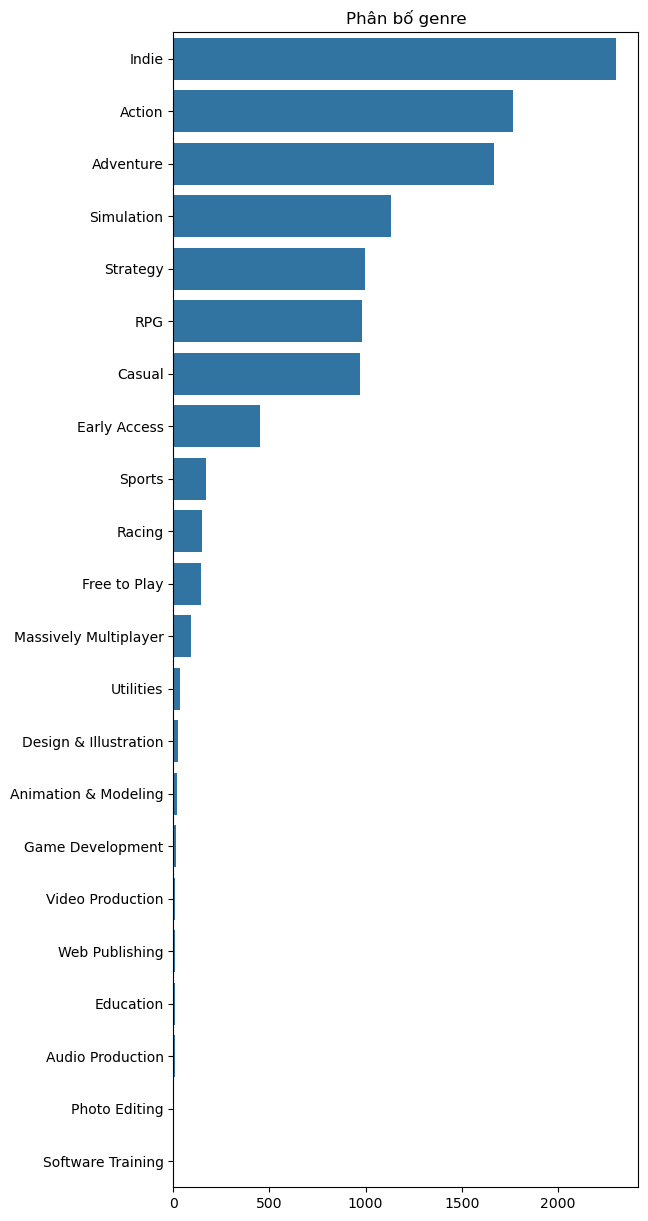

In [34]:
distributed_genre = get_distributed_cat('Genre')
distributed_genre = dict(sorted(distributed_genre.items(), key=lambda item: item[1],reverse=True))
print(distributed_genre)
f, ax = plt.subplots(figsize=(6, 15))
plt.title("Ph√¢n b·ªë genre")
sns.barplot(x=list(distributed_genre.values()), y=list(distributed_genre.keys()), ax=ax)

Nh√¨n tr√™n bi·ªÉu ƒë·ªì, ta th·∫•y s·ªë l∆∞·ª£ng game c√≥ genre l√† `Indie` chi·∫øm r·∫•t nhi·ªÅu, trong khi ƒë√≥ m·ªôt s·ªë genre ch·ªâ ƒë∆∞·ª£c ch·ªâ c√≥ trong 1 game m√† ch√∫ng ta ƒë√£ thu th·∫≠p.

Ti·∫øp theo ta th·ª≠ ki·ªÉm tra s·ªë l∆∞·ª£ng c√°c `Tags` nh∆∞ th·∫ø n√†o:

In [35]:
unique_tags = get_unique_values('Tags')
print(f'S·ªë l∆∞·ª£ng unique tag: {unique_tags}')

S·ªë l∆∞·ª£ng unique tag: 440


S·ªë l∆∞·ª£ng tag l√† 358, qu√° nhi·ªÅu ƒë·ªÉ th·ªÉ hi·ªán l√™n tr√™n bi·ªÉu ƒë·ªì. Do ƒë√≥ ta s·∫Ω ch·ªâ l·∫•y nh·ªØng tag c√≥ ph√¢n b·ªë l·ªõn nh·∫•t (kho·∫£ng 20) ƒë·ªÉ v·∫Ω bi·ªÉu ƒë·ªì:

<Axes: title={'center': 'Ph√¢n b·ªë tag'}>

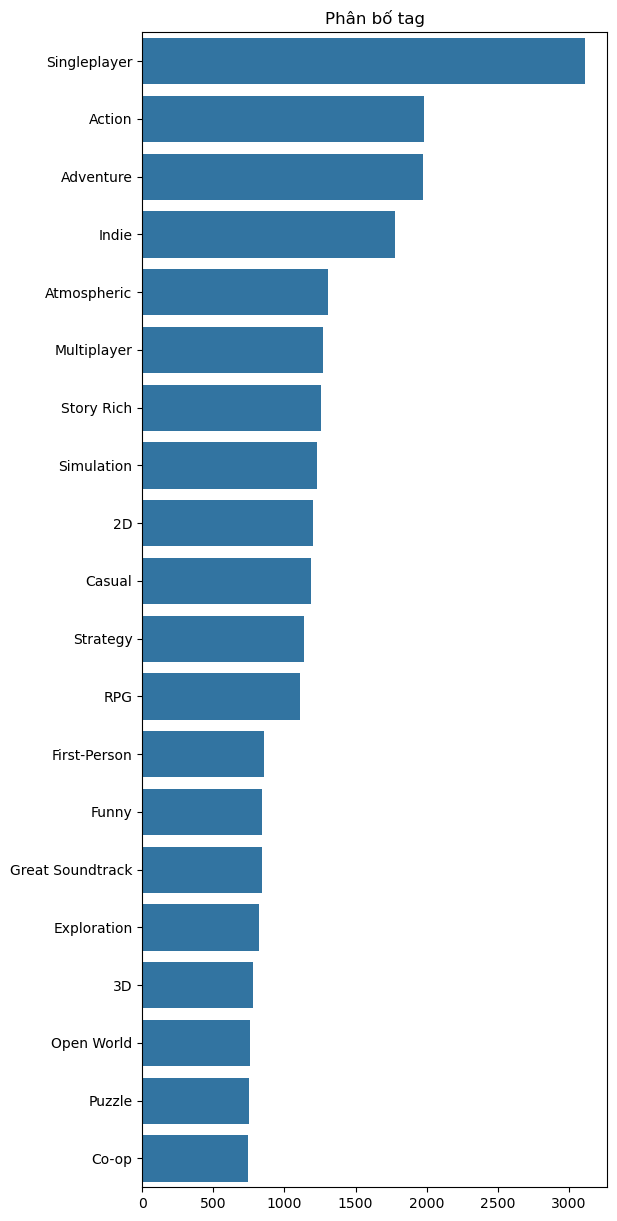

In [36]:
distributed_tag = get_distributed_cat('Tags')
distributed_tag = dict(sorted(distributed_tag.items(), key=lambda item: item[1], reverse=True))
# print(distributed_tag)
f, ax = plt.subplots(figsize=(6, 15))
plt.title("Ph√¢n b·ªë tag")
sns.barplot(x=list(distributed_tag.values())[:20], y=list(distributed_tag.keys())[:20], ax=ax)

Theo nh∆∞ quan s√°t v√† t√¨m hi·ªÉu, th√¨ `Genre` ƒë∆∞·ª£c ph√¢n lo·∫°i theo ƒë·∫∑c tr∆∞ng ch√≠nh v√† t·ªïng qu√°t c·ªßa game, c√≤n `Tags` l√† ph√¢n lo·∫°i theo c√°c y·∫øu t·ªë, n·ªôi dung trong game m·ªôt c√°ch chi ti·∫øt h∆°n.\
H∆°n n·ªØa do s·ªë l∆∞·ª£ng tag qu√° l·ªõn c√≥ th·ªÉ d·∫´n ƒë·∫øn kh√≥ encode v√† ·∫£nh h∆∞·ªüng ƒë·∫øn hi·ªáu nƒÉng c·ªßa m√¥ h√¨nh, ta n√™n drop n√≥ v√† ch·ªâ c·∫ßn gi·ªØ l·∫°i `Genre`.

In [37]:
df.drop('Tags', axis=1, inplace=True)
df

Title  \
0                  Endless Monday: Dreams and Deadlines   
1                                          SenrenÔºäBanka   
2                                          A Short Hike   
3                                              Aseprite   
4                                  Cats Hidden in Paris   
...                                                 ...   
4812                     The Will of Arthur Flabbington   
4828                                       Suika Shapes   
4832                               Mediterranea Inferno   
4834                                             TOSS!üçå   
4835  The Imperial Capital Burns - Muv-Luv Alternati...   

                                                  Genre withDLC isMature  \
0                                      Adventure, Indie   False    False   
1                                     Adventure, Casual   False     True   
2                                      Adventure, Indie   False    False   
3     Animation & Modeling, Design & Illustration, G...   False    False   
4                           Casual, Indie, Free to Play    True    False   
...                                                 ...     ...      ...   
4812                                   Adventure, Indie   False    False   
4828                                     Action, Casual   False    False   
4832                                          Adventure    True     True   
4834           Action, Adventure, Casual, Indie, Sports   False    False   
4835                                  Adventure, Casual   False     True   

     ReleaseDate       Developer       Publisher  \
0     2023-05-04          hcnone          hcnone   
1     2020-02-14        YUZUSOFT    HIKARI FIELD   
2     2019-07-30        adamgryu        adamgryu   
3     2016-02-22   David Capello    Igara Studio   
4     2023-07-16  Travellin Cats  Travellin Cats   
...          ...             ...             ...   
4812  2023-11-10         Gugames         Gugames   
4828  2023-11-27        Zanthous        Zanthous   
4832  2023-08-24         Eyeguys   Santa Ragione   
4834  2023-09-07     Agera Games   Vertigo Games   
4835  2023-11-14     aNCHOR Inc.     aNCHOR Inc.   

                                              Languages  PositiveReviews  \
0                                     English, Japanese              737   
1     English, Japanese, Simplified Chinese, Traditi...            17148   
2     English, French, Spanish - Latin America, Japa...            14772   
3                                               English            15565   
4     English, French, Italian, German, Spanish - Sp...            12039   
...                                                 ...              ...   
4812                                   English, Italian               61   
4828                                  English, Japanese               34   
4832  English, French, Italian, German, Spanish - Spain               36   
4834  English, French, Italian, German, Japanese, Si...               40   
4835                                  English, Japanese               29   

      TotalReviews  NegativeReviews     Price  
0              737                0  142000.0  
1            17298              150  280000.0  
2            14884              112  100000.0  
3            15693              128  188000.0  
4            12144              105       0.0  
...            ...              ...       ...  
4812            61                0  170000.0  
4828            34                0   59000.0  
4832            36                0  137350.0  
4834            40                0  131600.0  
4835            29                0  439000.0  

[3996 rows x 12 columns]

## S·ªë h√≥a c√°c feature

·ªû ƒë√¢y, ta s·∫Ω b·∫Øt ƒë·∫ßu s·ªë h√≥a c√°c d·ªØ li·ªáu category, datetime v√† boolean ƒë·ªÉ chu·∫©n b·ªã cho hu·∫•n luy·ªán m√¥ h√¨nh

ƒê·∫ßu ti√™n l√† s·ªë h√≥a c·ªôt datetime v√† boolean:

In [38]:
df[['withDLC', 'isMature']] = df[['withDLC', 'isMature']].replace({True: 1, False: 0})
df['ReleaseYear'] = df['ReleaseDate'].dt.year
df['ReleaseMonth'] = df['ReleaseDate'].dt.month
df['ReleaseDay'] = df['ReleaseDate'].dt.day

Sau khi s·ªë h√≥a c·ªôt datetime, ta ti·∫øn h√†nh drop c·ªôt `ReleaseDate`:

In [39]:
df.drop('ReleaseDate', axis=1, inplace=True)
df

Title  \
0                  Endless Monday: Dreams and Deadlines   
1                                          SenrenÔºäBanka   
2                                          A Short Hike   
3                                              Aseprite   
4                                  Cats Hidden in Paris   
...                                                 ...   
4812                     The Will of Arthur Flabbington   
4828                                       Suika Shapes   
4832                               Mediterranea Inferno   
4834                                             TOSS!üçå   
4835  The Imperial Capital Burns - Muv-Luv Alternati...   

                                                  Genre  withDLC  isMature  \
0                                      Adventure, Indie        0         0   
1                                     Adventure, Casual        0         1   
2                                      Adventure, Indie        0         0   
3     Animation & Modeling, Design & Illustration, G...        0         0   
4                           Casual, Indie, Free to Play        1         0   
...                                                 ...      ...       ...   
4812                                   Adventure, Indie        0         0   
4828                                     Action, Casual        0         0   
4832                                          Adventure        1         1   
4834           Action, Adventure, Casual, Indie, Sports        0         0   
4835                                  Adventure, Casual        0         1   

           Developer       Publisher  \
0             hcnone          hcnone   
1           YUZUSOFT    HIKARI FIELD   
2           adamgryu        adamgryu   
3      David Capello    Igara Studio   
4     Travellin Cats  Travellin Cats   
...              ...             ...   
4812         Gugames         Gugames   
4828        Zanthous        Zanthous   
4832         Eyeguys   Santa Ragione   
4834     Agera Games   Vertigo Games   
4835     aNCHOR Inc.     aNCHOR Inc.   

                                              Languages  PositiveReviews  \
0                                     English, Japanese              737   
1     English, Japanese, Simplified Chinese, Traditi...            17148   
2     English, French, Spanish - Latin America, Japa...            14772   
3                                               English            15565   
4     English, French, Italian, German, Spanish - Sp...            12039   
...                                                 ...              ...   
4812                                   English, Italian               61   
4828                                  English, Japanese               34   
4832  English, French, Italian, German, Spanish - Spain               36   
4834  English, French, Italian, German, Japanese, Si...               40   
4835                                  English, Japanese               29   

      TotalReviews  NegativeReviews     Price  ReleaseYear  ReleaseMonth  \
0              737                0  142000.0         2023             5   
1            17298              150  280000.0         2020             2   
2            14884              112  100000.0         2019             7   
3            15693              128  188000.0         2016             2   
4            12144              105       0.0         2023             7   
...            ...              ...       ...          ...           ...   
4812            61                0  170000.0         2023            11   
4828            34                0   59000.0         2023            11   
4832            36                0  137350.0         2023             8   
4834            40                0  131600.0         2023             9   
4835            29                0  439000.0         2023            11   

      ReleaseDay  
0              4  
1             14  
2             30  
3             22

Ti·∫øp theo ta encode c·ªôt `Genre` b·∫±ng **one hot encoding**:


In [40]:
# pd.get_dummies(df['Genre'])
one_hot_df = df['Genre'].copy()

one_hot_df = one_hot_df.str.split(', ')
one_hot_df = one_hot_df.explode()
one_hot_df = pd.get_dummies(one_hot_df, prefix='Genre_')
one_hot_df = one_hot_df.groupby(level=0).sum()
one_hot_df[one_hot_df > 0] = 1

In [41]:
df = pd.merge(df, one_hot_df, left_index=True, right_index=True)
df.drop('Genre', axis=1, inplace=True)
df

Title  withDLC  isMature  \
0                  Endless Monday: Dreams and Deadlines        0         0   
1                                          SenrenÔºäBanka        0         1   
2                                          A Short Hike        0         0   
3                                              Aseprite        0         0   
4                                  Cats Hidden in Paris        1         0   
...                                                 ...      ...       ...   
4812                     The Will of Arthur Flabbington        0         0   
4828                                       Suika Shapes        0         0   
4832                               Mediterranea Inferno        1         1   
4834                                             TOSS!üçå        0         0   
4835  The Imperial Capital Burns - Muv-Luv Alternati...        0         1   

           Developer       Publisher  \
0             hcnone          hcnone   
1           YUZUSOFT    HIKARI FIELD   
2           adamgryu        adamgryu   
3      David Capello    Igara Studio   
4     Travellin Cats  Travellin Cats   
...              ...             ...   
4812         Gugames         Gugames   
4828        Zanthous        Zanthous   
4832         Eyeguys   Santa Ragione   
4834     Agera Games   Vertigo Games   
4835     aNCHOR Inc.     aNCHOR Inc.   

                                              Languages  PositiveReviews  \
0                                     English, Japanese              737   
1     English, Japanese, Simplified Chinese, Traditi...            17148   
2     English, French, Spanish - Latin America, Japa...            14772   
3                                               English            15565   
4     English, French, Italian, German, Spanish - Sp...            12039   
...                                                 ...              ...   
4812                                   English, Italian               61   
4828                                  English, Japanese               34   
4832  English, French, Italian, German, Spanish - Spain               36   
4834  English, French, Italian, German, Japanese, Si...               40   
4835                                  English, Japanese               29   

      TotalReviews  NegativeReviews     Price  ...  Genre__Photo Editing  \
0              737                0  142000.0  ...                     0   
1            17298              150  280000.0  ...                     0   
2            14884              112  100000.0  ...                     0   
3            15693              128  188000.0  ...                     0   
4            12144              105       0.0  ...                     0   
...            ...              ...       ...  ...                   ...   
4812            61                0  170000.0  ...                     0   
4828            34                0   59000.0  ...                     0   
4832            36                0  137350.0  ...                     0   
4834            40                0  131600.0  ...                     0   
4835            29                0  439000.0  ...                     0   

      Genre__RPG  Genre__Racing  Genre__Simulation  Genre__Software Training  \
0              0              0                  0                         0   
1              0              0                  0                         0   
2              0              0                  0                         0   
3              0              0                  0                         0   
4              0              0                  0                         0   
...          ...            ...                ...                       ...   
4812           0              0                  0                         0   
4828           0              0                  0                         0   
4832           0              0                  0                         0   
4

Ki·ªÉm tra nh·ªØng ng√¥n ng·ªØ ph·ªï bi·∫øn trong game:

<Axes: title={'center': 'T√≠nh ph√¢n b·ªë c√°c ng√¥n ng·ªØ trong d·ªØ li·ªáu'}>

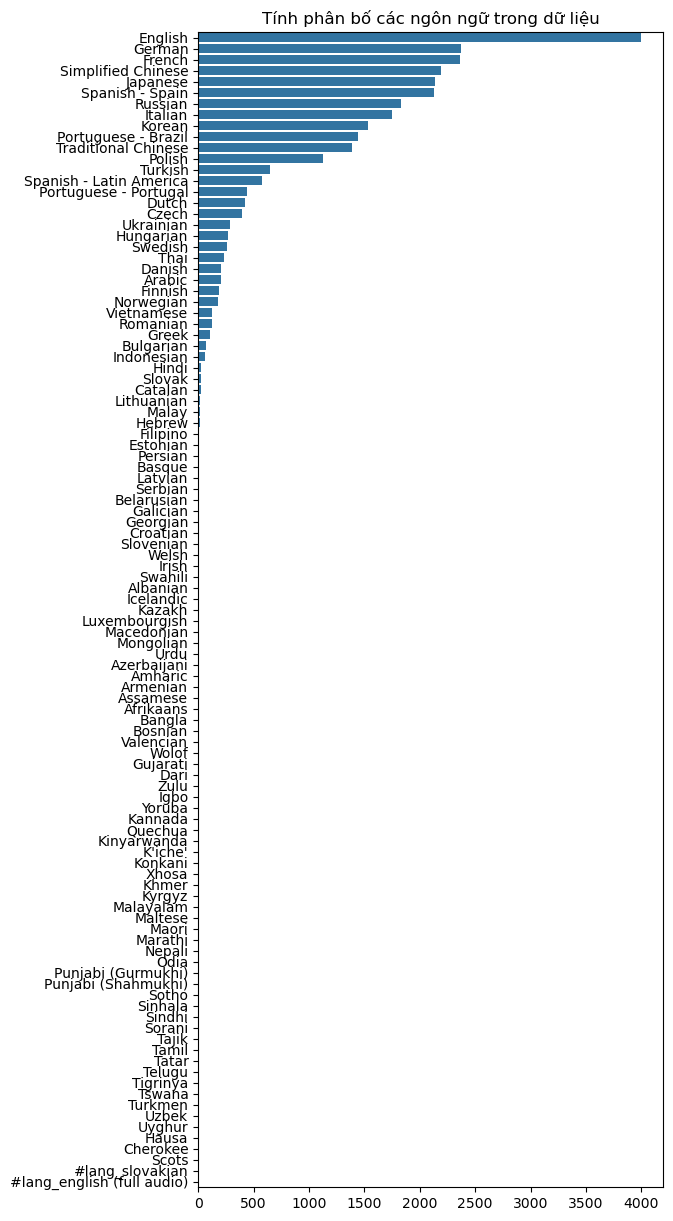

In [42]:
distributed_lan = get_distributed_cat('Languages')
distributed_lan = dict(sorted(distributed_lan.items(), key=lambda item: item[1], reverse=True))
# print(distributed_tag)
f, ax = plt.subplots(figsize=(6, 15))
plt.title("T√≠nh ph√¢n b·ªë c√°c ng√¥n ng·ªØ trong d·ªØ li·ªáu")
sns.barplot(x=list(distributed_lan.values()), y=list(distributed_lan.keys()), ax=ax)

Nh∆∞ ta th·∫•y, `English` v·∫´n l√† ng√¥n ng·ªØ ch√≠nh trong h·∫ßu h·∫øt c√°c game, v√† h·∫ßu h·∫øt ng∆∞·ªùi ch∆°i n·∫øu kh√¥ng c√≥ ng√¥n ng·ªØ b·∫£n ƒë·ªãa s·∫Ω s·ª≠ d·ª•ng `English` l√† ch·ªß y·∫øu, v√† n·∫øu kh√¥ng c√≥ `English` hay ng√¥n ng·ªØ b·∫£n ƒë·ªãa c·ªßa h·ªç, s·∫Ω kh√≥ ƒë·ªÉ game ƒë√≥ c√≥ th·ªÉ ti·∫øp c·∫≠n ƒë·∫øn ng∆∞·ªùi d√πng, ·∫£nh h∆∞·ªüng ƒë·∫øn ƒë√°nh gi√° c·ªßa game.\
Do ƒë√≥, ta c√≥ th·ªÉ ch·ªâ c·∫ßn t·∫°o m·ªôt c·ªôt ki·ªÉm tra xem c√≥ ng√¥n ng·ªØ `English` hay kh√¥ng:

In [43]:
df['HasEnglish'] = df['Languages'].apply(lambda x: 1 if 'English' in x.split(', ') else 0)
df.drop('Languages', axis=1, inplace=True)
df

Title  withDLC  isMature  \
0                  Endless Monday: Dreams and Deadlines        0         0   
1                                          SenrenÔºäBanka        0         1   
2                                          A Short Hike        0         0   
3                                              Aseprite        0         0   
4                                  Cats Hidden in Paris        1         0   
...                                                 ...      ...       ...   
4812                     The Will of Arthur Flabbington        0         0   
4828                                       Suika Shapes        0         0   
4832                               Mediterranea Inferno        1         1   
4834                                             TOSS!üçå        0         0   
4835  The Imperial Capital Burns - Muv-Luv Alternati...        0         1   

           Developer       Publisher  PositiveReviews  TotalReviews  \
0             hcnone          hcnone              737           737   
1           YUZUSOFT    HIKARI FIELD            17148         17298   
2           adamgryu        adamgryu            14772         14884   
3      David Capello    Igara Studio            15565         15693   
4     Travellin Cats  Travellin Cats            12039         12144   
...              ...             ...              ...           ...   
4812         Gugames         Gugames               61            61   
4828        Zanthous        Zanthous               34            34   
4832         Eyeguys   Santa Ragione               36            36   
4834     Agera Games   Vertigo Games               40            40   
4835     aNCHOR Inc.     aNCHOR Inc.               29            29   

      NegativeReviews     Price  ReleaseYear  ...  Genre__RPG  Genre__Racing  \
0                   0  142000.0         2023  ...           0              0   
1                 150  280000.0         2020  ...           0              0   
2                 112  100000.0         2019  ...           0              0   
3                 128  188000.0         2016  ...           0              0   
4                 105       0.0         2023  ...           0              0   
...               ...       ...          ...  ...         ...            ...   
4812                0  170000.0         2023  ...           0              0   
4828                0   59000.0         2023  ...           0              0   
4832                0  137350.0         2023  ...           0              0   
4834                0  131600.0         2023  ...           0              0   
4835                0  439000.0         2023  ...           0              0   

      Genre__Simulation  Genre__Software Training  Genre__Sports  \
0                     0                         0              0   
1                     0                         0              0   
2                     0                         0              0   
3                     0                         0              0   
4                     0                         0              0   
...                 ...                       ...            ...   
4812                  0                         0              0   
4828                  0                         0              0   
4832                  0                         0              0   
4834                  0                         0              1   
4835                  0                         0              0   

      Genre__Strategy  Genre__Utilities  Genre__Video Production  \
0                   0                 0                        0   
1                   0                 0                        0   
2                   0                 0                        0   
3                   0                 0                        0   
4                   0                 0                        0   
...               ...               ...                      ...   
4

Ki·ªÉm tra xem c·ªôt `HasEnglish` c√≥ gi√° tr·ªã kh√°c 1 kh√¥ng:

In [44]:
df[df['HasEnglish'] != 1]

Empty DataFrame
Columns: [Title, withDLC, isMature, Developer, Publisher, PositiveReviews, TotalReviews, NegativeReviews, Price, ReleaseYear, ReleaseMonth, ReleaseDay, Genre__Action, Genre__Adventure, Genre__Animation & Modeling, Genre__Audio Production, Genre__Casual, Genre__Design & Illustration, Genre__Early Access, Genre__Education, Genre__Free to Play, Genre__Game Development, Genre__Indie, Genre__Massively Multiplayer, Genre__Photo Editing, Genre__RPG, Genre__Racing, Genre__Simulation, Genre__Software Training, Genre__Sports, Genre__Strategy, Genre__Utilities, Genre__Video Production, Genre__Web Publishing, HasEnglish]
Index: []

[0 rows x 35 columns]

Kh√¥ng c√≥ game n√†o l√† kh√¥ng c√≥ `English`, Do ƒë√≥ c·ªôt n√†y kh√¥ng c√≥ gi√° tr·ªã g√¨ ƒë·ªÉ t√≠nh ƒëi·ªÉm.\
Ta s·∫Ω lo·∫°i b·ªè c·ªôt n√†y:

In [45]:
df.drop('HasEnglish', axis=1, inplace=True)
df

Title  withDLC  isMature  \
0                  Endless Monday: Dreams and Deadlines        0         0   
1                                          SenrenÔºäBanka        0         1   
2                                          A Short Hike        0         0   
3                                              Aseprite        0         0   
4                                  Cats Hidden in Paris        1         0   
...                                                 ...      ...       ...   
4812                     The Will of Arthur Flabbington        0         0   
4828                                       Suika Shapes        0         0   
4832                               Mediterranea Inferno        1         1   
4834                                             TOSS!üçå        0         0   
4835  The Imperial Capital Burns - Muv-Luv Alternati...        0         1   

           Developer       Publisher  PositiveReviews  TotalReviews  \
0             hcnone          hcnone              737           737   
1           YUZUSOFT    HIKARI FIELD            17148         17298   
2           adamgryu        adamgryu            14772         14884   
3      David Capello    Igara Studio            15565         15693   
4     Travellin Cats  Travellin Cats            12039         12144   
...              ...             ...              ...           ...   
4812         Gugames         Gugames               61            61   
4828        Zanthous        Zanthous               34            34   
4832         Eyeguys   Santa Ragione               36            36   
4834     Agera Games   Vertigo Games               40            40   
4835     aNCHOR Inc.     aNCHOR Inc.               29            29   

      NegativeReviews     Price  ReleaseYear  ...  Genre__Photo Editing  \
0                   0  142000.0         2023  ...                     0   
1                 150  280000.0         2020  ...                     0   
2                 112  100000.0         2019  ...                     0   
3                 128  188000.0         2016  ...                     0   
4                 105       0.0         2023  ...                     0   
...               ...       ...          ...  ...                   ...   
4812                0  170000.0         2023  ...                     0   
4828                0   59000.0         2023  ...                     0   
4832                0  137350.0         2023  ...                     0   
4834                0  131600.0         2023  ...                     0   
4835                0  439000.0         2023  ...                     0   

      Genre__RPG  Genre__Racing  Genre__Simulation  Genre__Software Training  \
0              0              0                  0                         0   
1              0              0                  0                         0   
2              0              0                  0                         0   
3              0              0                  0                         0   
4              0              0                  0                         0   
...          ...            ...                ...                       ...   
4812           0              0                  0                         0   
4828           0              0                  0                         0   
4832           0              0                  0                         0   
4834           0              0                  0                         0   
4835           0              0                  0                         0   

      Genre__Sports  Genre__Strategy  Genre__Utilities  \
0                 0                0                 0   
1                 0                0                 0   
2                 0                0                 0   
3                 0                0                 0   
4                 0                0                 0   
...             ...              ...         

C√≤n hai c·ªôt l√† `Developer` v√† `Publisher`, ta c≈©ng s·∫Ω ki·ªÉm tra t√≠nh ph√¢n b·ªë c·ªßa n√≥:

In [46]:
temp = df['Publisher'].value_counts()
temp

SEGA                  78
Ubisoft               49
Square Enix           44
Devolver Digital      44
Electronic Arts       35
                      ..
TurtleFox Games        1
EnDrew                 1
Raia Software Inc.     1
SideFX                 1
Zanthous               1
Name: Publisher, Length: 2032, dtype: int64

In [47]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Developer'] = label_encoder.fit_transform(df['Developer'])
df['Publisher'] = label_encoder.fit_transform(df['Publisher'])
df

Title  withDLC  isMature  \
0                  Endless Monday: Dreams and Deadlines        0         0   
1                                          SenrenÔºäBanka        0         1   
2                                          A Short Hike        0         0   
3                                              Aseprite        0         0   
4                                  Cats Hidden in Paris        1         0   
...                                                 ...      ...       ...   
4812                     The Will of Arthur Flabbington        0         0   
4828                                       Suika Shapes        0         0   
4832                               Mediterranea Inferno        1         1   
4834                                             TOSS!üçå        0         0   
4835  The Imperial Capital Burns - Muv-Luv Alternati...        0         1   

      Developer  Publisher  PositiveReviews  TotalReviews  NegativeReviews  \
0          2642       1951              737           737                0   
1          2594        725            17148         17298              150   
2          2623       1935            14772         14884              112   
3           569        804            15565         15693              128   
4          2375       1749            12039         12144              105   
...         ...        ...              ...           ...              ...   
4812        960        719               61            61                0   
4828       2613       1926               34            34                0   
4832        751       1461               36            36                0   
4834         85       1817               40            40                0   
4835       2622       1934               29            29                0   

         Price  ReleaseYear  ...  Genre__Photo Editing  Genre__RPG  \
0     142000.0         2023  ...                     0           0   
1     280000.0         2020  ...                     0           0   
2     100000.0         2019  ...                     0           0   
3     188000.0         2016  ...                     0           0   
4          0.0         2023  ...                     0           0   
...        ...          ...  ...                   ...         ...   
4812  170000.0         2023  ...                     0           0   
4828   59000.0         2023  ...                     0           0   
4832  137350.0         2023  ...                     0           0   
4834  131600.0         2023  ...                     0           0   
4835  439000.0         2023  ...                     0           0   

      Genre__Racing  Genre__Simulation  Genre__Software Training  \
0                 0                  0                         0   
1                 0                  0                         0   
2                 0                  0                         0   
3                 0                  0                         0   
4                 0                  0                         0   
...             ...                ...                       ...   
4812              0                  0                         0   
4828              0                  0                         0   
4832              0                  0                         0   
4834              0                  0                         0   
4835              0                  0                         0   

      Genre__Sports  Genre__Strategy  Genre__Utilities  \
0                 0                0                 0   
1                 0                0                 0   
2                 0                0                 0   
3                 0                0                 0   
4                 0                0                 0   
...             ...              ...               ...   
4812              0                0                 0   
4828              0                0             

V·∫≠y l√† c∆° b·∫£n ta ƒë√£ ho√†n th√†nh s·ªë h√≥a d·ªØ li·ªáu.

# Ki·ªÉm tra t√≠nh t∆∞∆°ng quan c·ªßa d·ªØ li·ªáu (Correlation)

Ki·ªÉm tra t√≠nh t∆∞∆°ng quan d·ªØ li·ªáu gi√∫p ta t√¨m ƒë∆∞·ª£c c√°c m·ªëi quan h·ªá trong d·ªØ li·ªáu ƒë·ªÉ l·ªçc ra nh·ªØng feature ph√π h·ª£p cho m√¥ h√¨nh d·ª± ƒëo√°n.

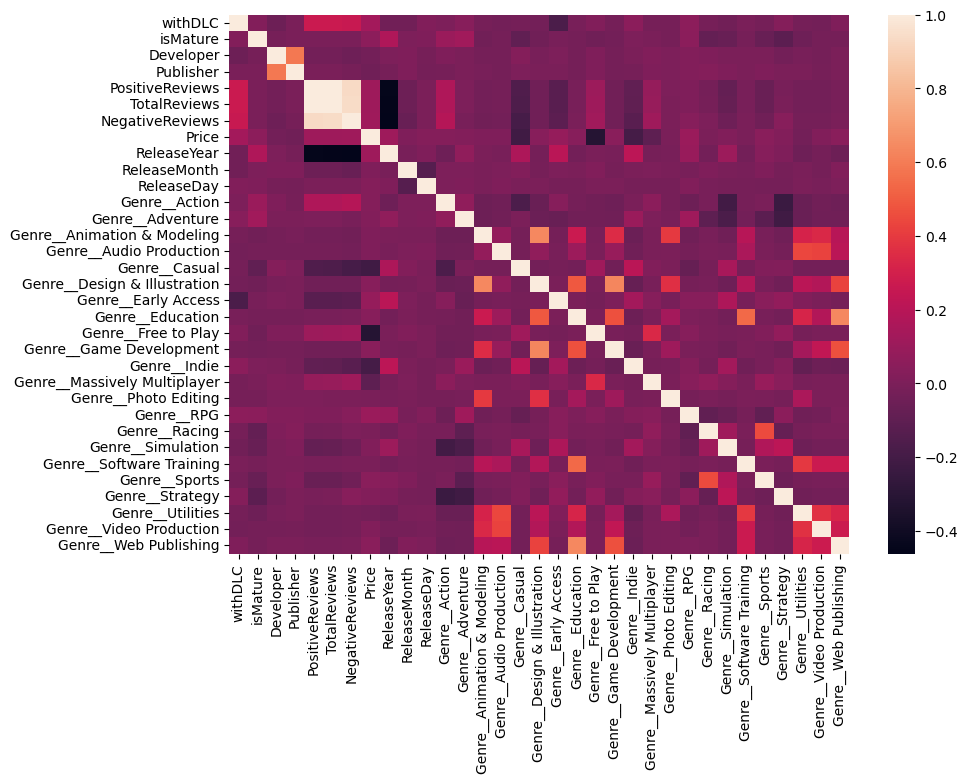

In [48]:

df_copy = df.copy()
# df_copy = df_copy.drop(df.filter(regex='Genre').columns, axis=1)

# calculate correlation matrix
corr_matrix = df_copy.corr(method='spearman', numeric_only=True)

# plot heatmap graph
plt.subplots(figsize=(10,7))
sns.heatmap(corr_matrix)
plt.show()


### Ki·ªÉm tra c√°c outliers c·ªßa d·ªØ li·ªáu:

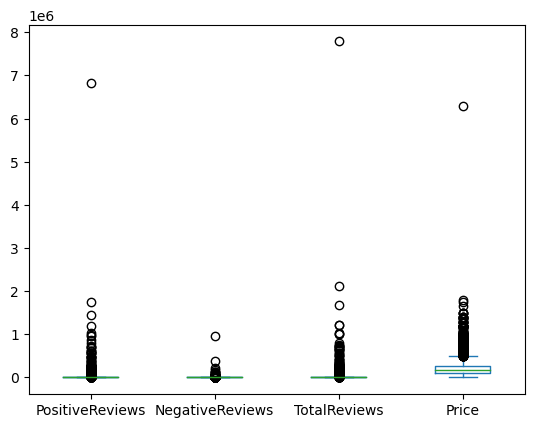

In [49]:
# plt.figure(figsize=(40,90))
df[['PositiveReviews', 'NegativeReviews', 'TotalReviews', 'Price']].plot(kind='box')
plt.show()

In [50]:
#outlier detection func with iqr value on price col
def outlier_detection_iqr(temp_df, feature):
    
    outlier_rows = []
    Q1 = np.percentile(temp_df[feature], 25)
    Q3 = np.percentile(temp_df[feature], 75)
    IQR = Q3 - Q1
    IQR_range = 1.5 * IQR
    return temp_df[(temp_df[feature] > Q1 - IQR_range) & (temp_df[feature] < Q3 + IQR_range)]

X√≥a c√°c outliers:

<Axes: >

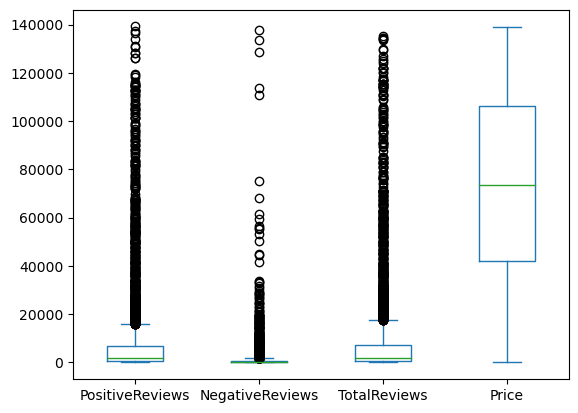

In [51]:
numeric_cols = ['PositiveReviews', 'NegativeReviews', 'TotalReviews', 'Price']
# for col in numeric_cols:
no_outliers_df = df[numeric_cols].copy()
df = outlier_detection_iqr(df, numeric_cols)
df[numeric_cols].plot(kind='box')

Ta th·∫•y c√°c thu·ªôc t√≠nh ta v·ª´a ki·ªÉm tra gi√° tr·ªã outlier ·ªü tr√™n c√≥ gi√° tr·ªã t∆∞∆°ng quan m·∫°nh (tr·ª´ `Price`) ƒë∆∞·ª£c hi·ªÉn th·ªã tr√™n heatmap. Gi·ªù ta s·∫Ω ki·ªÉm tra xem c√°c gi√° tr·ªã n√†y c√≥ quan h·ªá nh∆∞ th·∫ø n√†o.

/home/cheep/miniconda3/envs/min_ds-env/lib/python3.10/site-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


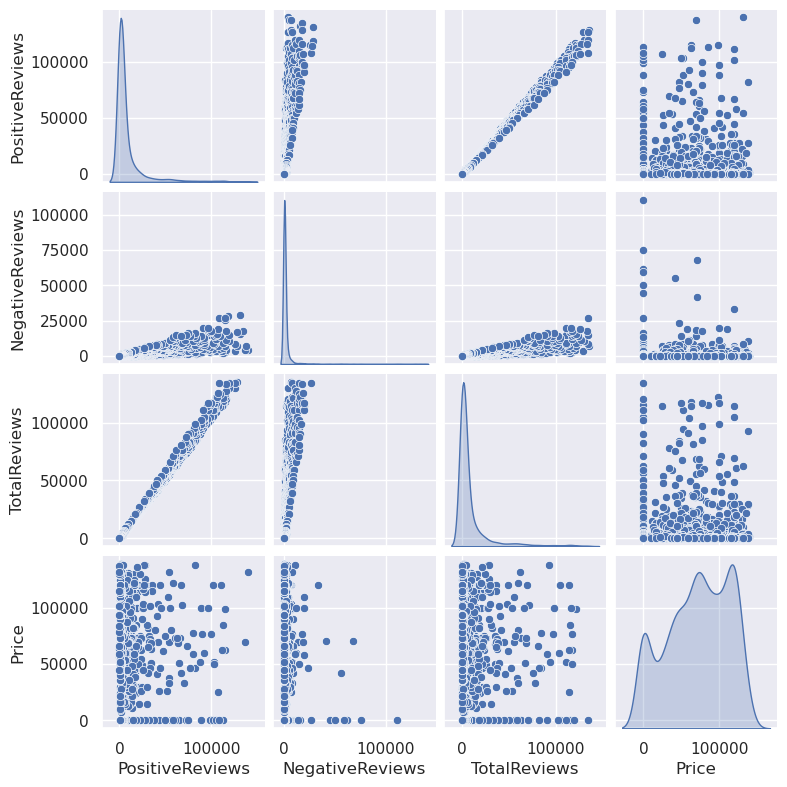

In [60]:
sns.set()
sns.pairplot(df[numeric_cols], size = 2 ,kind ='scatter',diag_kind='kde')
plt.show()